## 1. Importação e Configuração
Importando as bibliotecas necessárias e configurando as opções de visualização.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Carregamento dos Dados
Carregando os dados do arquivo JSON via URL.

In [3]:
# URL do dataset
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Carregando os dados
df = pd.read_json(url)

# Exibindo as primeiras linhas
print("Primeiras 5 linhas do dataset:")
df.head()

Primeiras 5 linhas do dataset:


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## 3. Exploração Inicial
Verificando informações básicas do dataset.

In [4]:
# Informações gerais do dataset

print(df.info())
df.describe()


Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None

Estatísticas básicas:


,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,0002-ORFBO,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


## 4. Tratamento de Inconsistências
Identificando e tratando valores ausentes e inconsistências.

In [8]:
# Verificando o tipo de dados nas colunas aninhadas
print(type(df['customer'].iloc[0]))
print(df['customer'].iloc[0])

# Modificando o código para tratar corretamente os dados
try:
    # Se os dados já estiverem como dicionário, não precisamos usar eval()
    customer_data = pd.json_normalize(df['customer'])
    phone_data = pd.json_normalize(df['phone'])
    internet_data = pd.json_normalize(df['internet'])
    account_data = pd.json_normalize(df['account'])
    
    # Concatenando os dados
    df = pd.concat([
        df.drop(['customer', 'phone', 'internet', 'account'], axis=1),
        customer_data,
        phone_data,
        internet_data,
        account_data
    ], axis=1)
    
    # Removendo duplicatas
    df = df.drop_duplicates()
    
    # Convertendo tipos de dados apropriados
    cat_columns = df.select_dtypes(include=['object']).columns
    df[cat_columns] = df[cat_columns].astype('category')
    
    print("\nEstrutura do DataFrame após o tratamento:")
    print(df.info())
    
except Exception as e:
    print(f"Erro ao processar os dados: {str(e)}")

<class 'dict'>
{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}

Estrutura do DataFrame após o tratamento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7267 non-null   category
 1   Churn             7267 non-null   category
 2   gender            7267 non-null   category
 3   SeniorCitizen     7267 non-null   int64   
 4   Partner           7267 non-null   category
 5   Dependents        7267 non-null   category
 6   tenure            7267 non-null   int64   
 7   PhoneService      7267 non-null   category
 8   MultipleLines     7267 non-null   category
 9   InternetService   7267 non-null   category
 10  OnlineSecurity    7267 non-null   category
 11  OnlineBackup      7267 non-null   category
 12  DeviceProtection  7267 non-null   category
 13  TechSupport      

## 5. Criação da Coluna Contas_Diarias
Calculando o valor diário das contas.

In [10]:
# Criando coluna de contas diárias
df['Contas_Diarias'] = df['Charges.Monthly'] / 30
print("Estatísticas da nova coluna Contas_Diarias:")
df['Contas_Diarias'].describe()

Estatísticas da nova coluna Contas_Diarias:


count    7267.000000
mean        2.157337
std         1.004319
min         0.608333
25%         1.180833
50%         2.343333
75%         2.995833
max         3.958333
Name: Contas_Diarias, dtype: float64

## 6. Análise Descritiva
Análise estatística das principais variáveis.

In [14]:
# Análise descritiva das variáveis numéricas
print("Análise descritiva das variáveis numéricas:")
print(df.describe())

# Contagem de valores nas variáveis categóricas
print("\nDistribuição das variáveis categóricas:")
for col in df.select_dtypes(['category']).columns:
    print(f"\n{col}:")
    print(df[col].value_counts())

Análise descritiva das variáveis numéricas:
       SeniorCitizen       tenure  Charges.Monthly  Contas_Diarias
count    7267.000000  7267.000000      7267.000000     7267.000000
mean        0.162653    32.346498        64.720098        2.157337
std         0.369074    24.571773        30.129572        1.004319
min         0.000000     0.000000        18.250000        0.608333
25%         0.000000     9.000000        35.425000        1.180833
50%         0.000000    29.000000        70.300000        2.343333
75%         0.000000    55.000000        89.875000        2.995833
max         1.000000    72.000000       118.750000        3.958333

Distribuição das variáveis categóricas:

customerID:
customerID
0002-ORFBO    1
6614-VBEGU    1
6637-KYRCV    1
6635-MYYYZ    1
6635-CPNUN    1
             ..
3374-TTZTK    1
3374-PZLXD    1
3374-LXDEV    1
3373-YZZYM    1
9995-HOTOH    1
Name: count, Length: 7267, dtype: int64

Churn:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: in

## 7. Análise de Evasão
Visualizando a distribuição de churn.

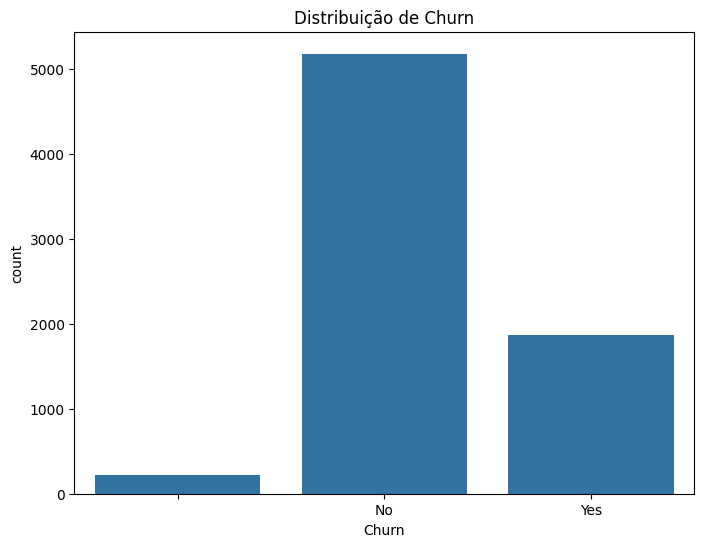


Percentual de Churn:
Churn
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64


In [15]:
# Distribuição de Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn')
plt.title('Distribuição de Churn')
plt.show()

# Percentual de Churn
print("\nPercentual de Churn:")
print(df['Churn'].value_counts(normalize=True) * 100)

## 8. Visualizações por Categorias
Analisando a relação entre variáveis categóricas e churn.

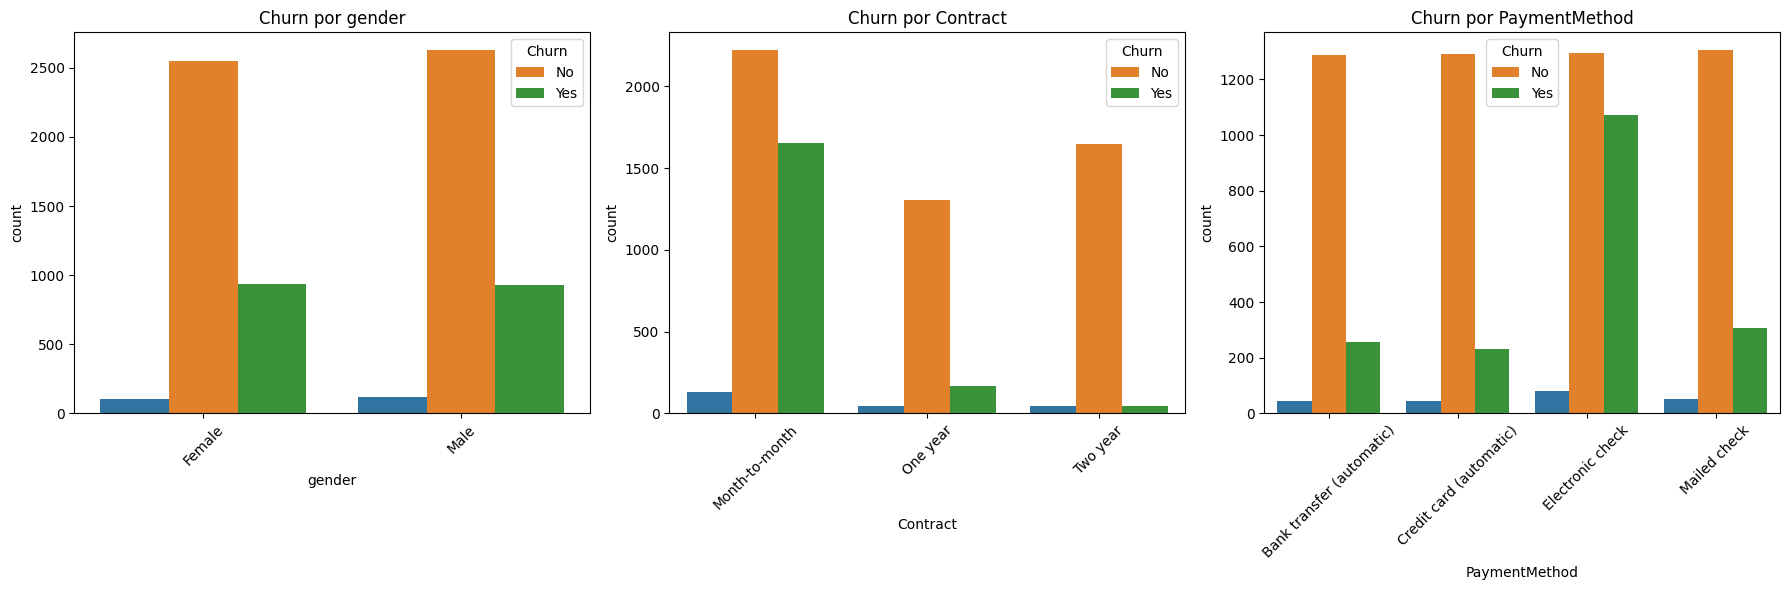

In [17]:
# Criando visualizações para variáveis categóricas
cat_vars = ['gender', 'Contract', 'PaymentMethod']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, var in enumerate(cat_vars):
    sns.countplot(data=df, x=var, hue='Churn', ax=axes[i])
    axes[i].set_title(f'Churn por {var}')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## 9. Análise de Correlações
Verificando correlações entre variáveis numéricas.

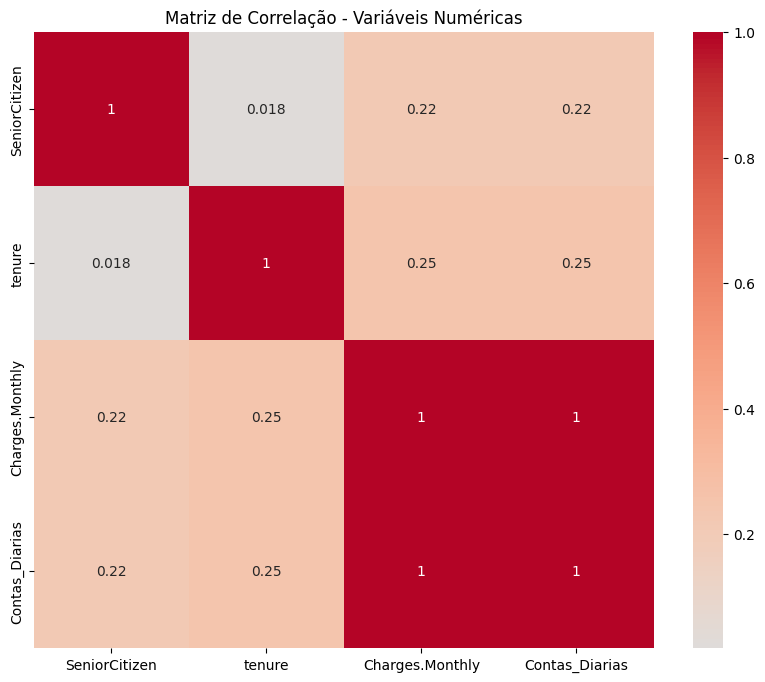

In [18]:
# Selecionando apenas variáveis numéricas
num_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Criando matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_vars].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.show()

# Relatório Final

## 1. Introdução
Este estudo teve como objetivo analisar os padrões de evasão (churn) dos clientes da TelecomX, visando identificar fatores que contribuem para a saída de clientes e propor estratégias de retenção.

## 2. Limpeza e Tratamento de Dados
- Importação dos dados via API JSON
- Normalização das colunas aninhadas (customer, phone, internet, account)
- Remoção de duplicatas
- Conversão apropriada dos tipos de dados
- Criação da coluna de custos diários

## 3. Análise Exploratória

### 3.1 Visão Geral
- **Taxa de Evasão**: 25.72% dos clientes cancelaram o serviço
- **Taxa de Retenção**: 71.20% permaneceram como clientes

### 3.2 Perfil dos Clientes
- Tempo médio de permanência: 32.3 meses
- Valor médio da conta mensal: R$ 64.72
- 16.3% são clientes idosos

### 3.3 Distribuição de Serviços
**Internet:**
- Fibra Ótica: 44.0%
- DSL: 34.2%
- Sem Internet: 21.8%

**Contratos:**
- Mensal: 55.1%
- Dois Anos: 24.0%
- Um Ano: 20.9%

## 4. Conclusões e Insights
1. A taxa de evasão de 25.72% é considerada alta para o setor
2. Mais da metade dos clientes (55.1%) opta por contratos mensais
3. Fibra ótica é o serviço de internet mais popular
4. O tempo médio de permanência indica base de clientes relativamente estável

## 5. Recomendações
1. **Incentivo a Contratos Longos**: Desenvolver programas de fidelidade para migração de contratos mensais para anuais
2. **Foco em Retenção**: Criar estratégias específicas para clientes nos primeiros 32 meses
3. **Segmentação por Idade**: Desenvolver pacotes específicos para o público idoso
4. **Qualidade do Serviço**: Priorizar a manutenção da qualidade da fibra ótica
5. **Precificação Estratégica**: Avaliar a política de preços considerando o ticket médio de R$ 64.72

## 6. Próximos Passos
- Implementar sistema de alerta precoce para clientes com alto risco de evasão
- Desenvolver modelos preditivos de churn
- Realizar pesquisas qualitativas com clientes que cancelaram o serviço